<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Selecting-Amphibian-samples" data-toc-modified-id="Selecting-Amphibian-samples-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Selecting Amphibian samples</a></span><ul class="toc-item"><li><span><a href="#summary" data-toc-modified-id="summary-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>summary</a></span></li></ul></li><li><span><a href="#LLMGAG" data-toc-modified-id="LLMGAG-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>LLMGAG</a></span><ul class="toc-item"><li><span><a href="#Run" data-toc-modified-id="Run-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Run</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Number-of-genes-assembled-&amp;-clustered" data-toc-modified-id="Number-of-genes-assembled-&amp;-clustered-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Number of genes assembled &amp; clustered</a></span></li><li><span><a href="#Taxonomy" data-toc-modified-id="Taxonomy-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Taxonomy</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Annotations" data-toc-modified-id="Annotations-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Annotations</a></span><ul class="toc-item"><li><span><a href="#COG-functional-categories" data-toc-modified-id="COG-functional-categories-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>COG functional categories</a></span><ul class="toc-item"><li><span><a href="#Grouped-by-taxonomy" data-toc-modified-id="Grouped-by-taxonomy-6.3.1.1"><span class="toc-item-num">6.3.1.1&nbsp;&nbsp;</span>Grouped by taxonomy</a></span></li></ul></li></ul></li><li><span><a href="#humann2-db-genes" data-toc-modified-id="humann2-db-genes-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>humann2 db genes</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#By-taxonomy" data-toc-modified-id="By-taxonomy-6.4.1.1"><span class="toc-item-num">6.4.1.1&nbsp;&nbsp;</span>By taxonomy</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Metagenome assembly of Amphibian samples
  * assemblying genes by using `plass`

# Var

In [1]:
work_dir = '/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_amp/LLMGAG/'

samples_file = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/samples_cov-gte0.3.tsv'
metadata_file = '/ebio/abt3_projects/Georg_animal_feces/data/mapping/unified_metadata_complete_190529.tsv'

pipeline_dir = '/ebio/abt3_projects/Georg_animal_feces/bin/llmgag/'


# Init

In [3]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
source('/ebio/abt3_projects/Georg_animal_feces/code/misc_r_functions/init.R')

# Selecting Amphibian samples

In [4]:
meta = read.delim(metadata_file, sep='\t') %>%
    dplyr::select(SampleID, class, order, family, genus, scientific_name, diet, habitat)
meta %>% dfhead

[1] 475   8


SampleID,class,order,family,genus,scientific_name,diet,habitat
F14_Common_Bream,Actinopterygii,Cypriniformes,Cyprinidae,Abramis,Abramis_brama,omnivore,aquatic habitat
F35_Red_Deer,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus_elaphus,herbivore,terrestrial habitat
F36_Red_Deer,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus_elaphus,herbivore,terrestrial habitat


In [5]:
samps = read.delim(samples_file, sep='\t') %>%
    mutate(Sample = gsub('^XF', 'F', Sample))
samps %>% dfhead

[1] 291   6


Sample,Read1,Read2,Total.Sequences,nonpareil_coverage,nonpareil_diversity
X144_Cattle,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R2_final.fq.gz,10471331,0.3073356,22.03854
X370_African_Bush_Elephant,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R2_final.fq.gz,551609,0.3190188,18.99648
X80_European_Otter,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X80_European_Otter/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X80_European_Otter/R2_final.fq.gz,1100413,0.3194258,20.45510


In [6]:
setdiff(samps$Sample, meta$Sample)

[1] "unassigned"

In [7]:
# joining
samps = samps %>%
    inner_join(meta, c('Sample'='SampleID')) 

samps %>% dfhead

Warning message:
“Column `Sample`/`SampleID` joining character vector and factor, coercing into character vector”

[1] 290  13


Sample,Read1,Read2,Total.Sequences,nonpareil_coverage,nonpareil_diversity,class,order,family,genus,scientific_name,diet,habitat
X144_Cattle,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R2_final.fq.gz,10471331,0.3073356,22.03854,Mammalia,Artiodactyla,Bovidae,Bos,Bos_taurus,herbivore,terrestrial habitat
X370_African_Bush_Elephant,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R2_final.fq.gz,551609,0.3190188,18.99648,Mammalia,Proboscidea,Elephantidae,Loxodonta,Loxodonta_africana,herbivore,terrestrial habitat
X80_European_Otter,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X80_European_Otter/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X80_European_Otter/R2_final.fq.gz,1100413,0.3194258,20.45510,Mammalia,Carnivora,Mustelidae,Lutra,Lutra_lutra,carnivore,terrestrial habitat


In [8]:
# all metadata 
samps %>%
    group_by(class) %>%
    summarize(n = n()) %>%
    ungroup()

class,n
Actinopterygii,27
Amphibia,8
Aves,63
Mammalia,179
Reptilia,13


In [9]:
samps_f = samps %>%
    filter(class == 'Amphibia') 

samps_f %>% dfhead

[1]  8 13


Sample,Read1,Read2,Total.Sequences,nonpareil_coverage,nonpareil_diversity,class,order,family,genus,scientific_name,diet,habitat
X345_fail_Alpine_Salamander,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X345_fail_Alpine_Salamander/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X345_fail_Alpine_Salamander/R2_final.fq.gz,243586,0.3731663,18.06532,Amphibia,Caudata,Salamandridae,Salamandra,Salamandra_atra,carnivore,terrestrial habitat
X193_fail_Common_Frog,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X193_fail_Common_Frog/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X193_fail_Common_Frog/R2_final.fq.gz,5133809,0.5145879,19.69866,Amphibia,Anura,Ranidae,Rana,Rana_temporaria,carnivore,terrestrial habitat
X36_Agile_Frog,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X36_Agile_Frog/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X36_Agile_Frog/R2_final.fq.gz,861411,0.5153954,18.04280,Amphibia,Anura,Ranidae,Rana,Rana_dalmatina,carnivore,terrestrial habitat


In [10]:
outF = file.path(work_dir, 'samples_amp.tsv')
samps_f %>%
    arrange(class, order, family, genus) %>%
    write.table(outF, sep='\t', quote=FALSE, row.names=FALSE)
cat('File written:', outF, '\n')

File written: /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_amp/LLMGAG//samples_amp.tsv 


## summary

In [11]:
samps_f$Total.Sequences %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 243586  832355 1255268 2274164 3542984 5686076 

# LLMGAG 

In [12]:
F = file.path(work_dir, 'config.yaml')
cat_file(F)

#-- I/O --#
# table with sample --> read_file information
samples_file: ./tests/samples/samples_amy_n6.txt

# output location
output_dir: tests/output_amy_n6/

#-- database --#
## eggnog mapper
eggnog_diamond_db: /ebio/abt3_projects/databases_no-backup/Eggnog/eggnog_proteins.dmnd
eggnog_db: /ebio/abt3_projects/databases_no-backup/Eggnog/eggnog.db
eggnog_og2lev_db: /ebio/abt3_projects/databases_no-backup/Eggnog/og2level.tsv.gz
## mmseqs taxonomy
mmseqs_tax_db: /ebio/abt3_projects/databases_no-backup/uniclust/uniclust50/uniclust50_2018_08_consensus
## checkM
checkM_data: /ebio/abt3_projects/databases_no-backup/checkM/
## sourmash
sourmash_db: /ebio/abt3_projects/databases_no-backup/sourmash/genbank-k31.sbt.json
sourmash_lca_db: /ebio/abt3_projects/databases_no-backup/sourmash/genbank-k31.lca.json.gz
# humann2 diamond
humann2_diamond_db: /ebio/abt3_projects/databases_no-backup/humann2/uniref50/uniref50_annotated.1.1.dmnd
# empanada
empanada_kegg_db: /ebio/abt3_projects/databases_no-backup

## Run

```{bash}
(snakemake_dev) @ rick:/ebio/abt3_projects/Georg_animal_feces/bin/llmgag
$ screen -L -S llmgag-ga-amp ./snakemake_sge.sh /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_amp/LLMGAG/config.yaml cluster.json /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_amp/LLMGAG/SGE_log 20
```

# Summary

## Number of genes assembled & clustered

In [43]:
F = file.path(work_dir, 'assembly', 'plass', 'genes.faa')
cmd = glue::glue('grep -c ">" {fasta}', fasta=F)
n_raw_seqs = system(cmd, intern=TRUE)
cat('Number of assembled sequences:', n_raw_seqs, '\n')

Number of assembled sequences: 3355557 


In [44]:
F = file.path(work_dir, 'cluster', 'linclust', 'clusters_rep-seqs.faa')
cmd = glue::glue('grep -c ">" {fasta}', fasta=F)
n_rep_seqs = system(cmd, intern=TRUE)
cat('Number of cluster rep sequences:', n_rep_seqs, '\n')

Number of cluster rep sequences: 2159403 


In [45]:
F = file.path(work_dir, 'humann2_db', 'clusters_rep-seqs.faa.gz')
cmd = glue::glue('gunzip -c {fasta} | grep -c ">"', fasta=F)
n_h2_seqs = system(cmd, intern=TRUE)
cat('Number of humann2_db-formatted seqs:', n_h2_seqs, '\n')

Number of humann2_db-formatted seqs: 86254 


## Taxonomy

In [46]:
# reading in taxonomy table
## WARING: slow
F = file.path(work_dir, 'taxonomy', 'clusters_rep-seqs_tax_db.tsv.gz')
cmd = glue::glue('gunzip -c {file}', file=F) 
coln = c('seqID', 'taxID', 'rank', 'spp', 'lineage')
levs = c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')
tax = fread(cmd, sep='\t', header=FALSE, col.names=coln, fill=TRUE) %>%
    separate(lineage, levs, sep=':')
tax %>% dfhead

Warning message:
“Expected 7 pieces. Additional pieces discarded in 30320 rows [120, 123, 177, 270, 528, 552, 553, 601, 651, 684, 707, 771, 949, 950, 974, 979, 1083, 1201, 1264, 1576, ...].”Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 1277138 rows [8, 10, 17, 18, 19, 20, 21, 24, 27, 28, 29, 30, 32, 34, 36, 38, 39, 40, 41, 43, ...].”

[1] 2159403      11


seqID,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
d846c56dd1074918a8ec1e569089540e,1261,species,Peptostreptococcus anaerobius,unknown,Firmicutes,Clostridia,Clostridiales,Peptostreptococcaceae,Peptostreptococcus,Peptostreptococcus anaerobius
f1c8b5118cfa4d03ab7b32a9fdd0ca1c,1128398,no rank,Gottschalkia acidurici 9a,unknown,Firmicutes,Tissierellia,Tissierellales,Gottschalkiaceae,Gottschalkia,Gottschalkia acidurici
cb0569ac2fa84f0e9efa066f56e3676a,215200,species,Peptostreptococcus russellii,unknown,Firmicutes,Clostridia,Clostridiales,Peptostreptococcaceae,Peptostreptococcus,Peptostreptococcus russellii


In [47]:
# number of sequences
tax$seqID %>% unique %>% length %>% print

[1] 2159403


In [48]:
# which ranks found?
tax$rank %>% table %>% print

.
           class           cohort           family            forma 
             718              169              401                8 
           genus       infraclass       infraorder          kingdom 
            1992              104               17               90 
         no rank            order        parvorder           phylum 
         1394712             2002                3             1438 
         species    species group species subgroup         subclass 
          743680               51                9               30 
       subfamily         subgenus       subkingdom         suborder 
              74                1                7              194 
       subphylum       subspecies         subtribe       superclass 
               5            12219                1              193 
     superfamily     superkingdom       superorder            tribe 
               8             1192               46                8 
        varietas 
              

In [49]:
# number of classifications per seqID
tax %>%
    group_by(seqID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    .$n %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

### Summary

In [50]:
# summarizing taxonomy
tax_s = tax %>%
    filter(Domain != '',
           Phylum != '') %>%
    group_by(Domain, Phylum) %>%
    summarize(n = seqID %>% unique %>% length) %>%
    ungroup() 
 
tax_s %>% dfhead

[1] 181   3


Domain,Phylum,n
Fungi,Ascomycota,1148
Fungi,Basidiomycota,1862
Fungi,Blastocladiomycota,2


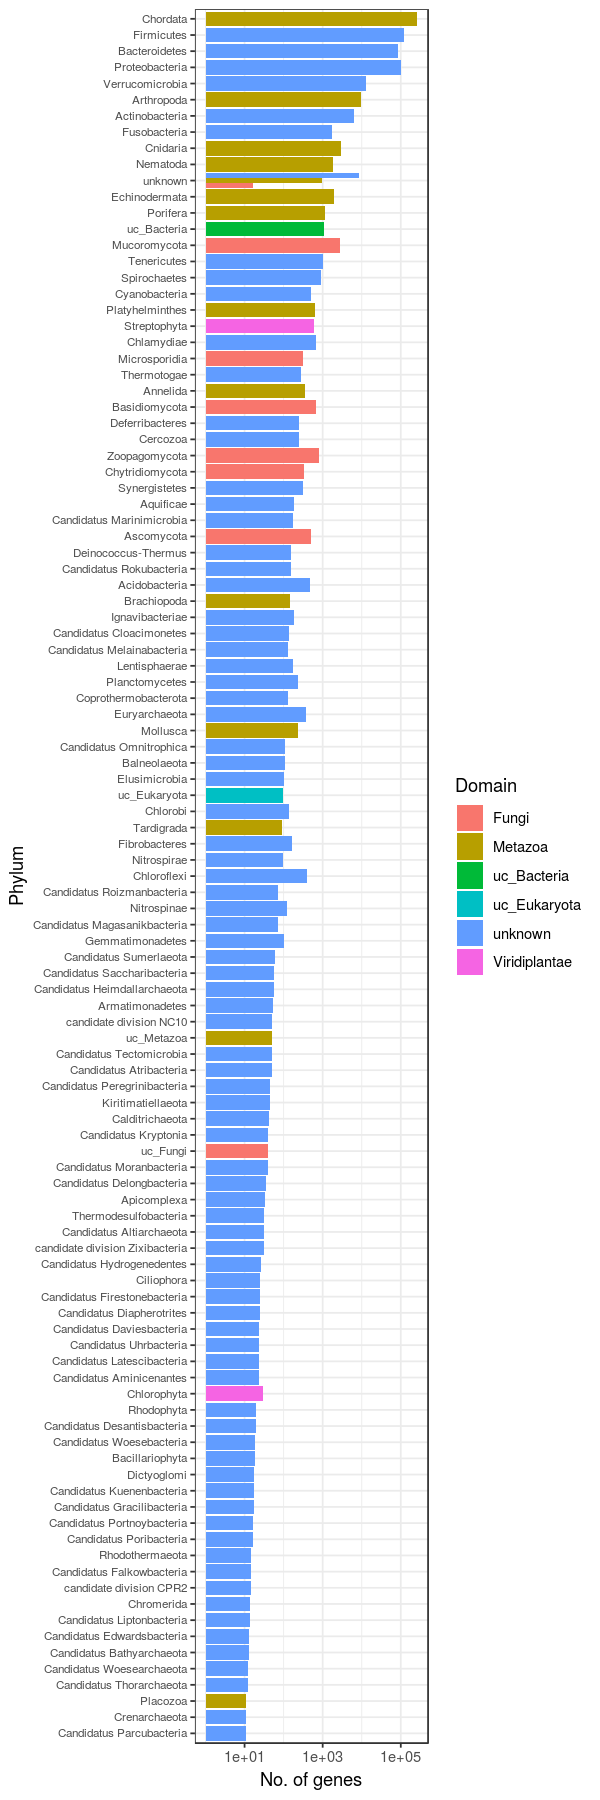

In [55]:
p = tax_s %>%
    filter(n > 10) %>%
    mutate(Phylum = Phylum %>% reorder(n)) %>%
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    labs(y = 'No. of genes') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    )

dims(5,15)
plot(p)

In [52]:
tax_s %>% 
    arrange(-n) %>%
    head(n=30)

Domain,Phylum,n
Metazoa,Chordata,401555
unknown,Firmicutes,177369
unknown,Proteobacteria,115342
unknown,Bacteroidetes,99709
Metazoa,Arthropoda,17794
unknown,Verrucomicrobia,14637
unknown,Actinobacteria,9181
unknown,unknown,8704
Metazoa,Echinodermata,3493
Metazoa,Cnidaria,3034


In [53]:
# summarizing taxonomy at the class level
tax_s = tax %>%
    filter(Domain != '',
           Phylum != '',
           Class != '') %>%
    group_by(Domain, Phylum, Class) %>%
    summarize(n = seqID %>% unique %>% length) %>%
    ungroup() 
 
tax_s %>% dfhead

[1] 368   4


Domain,Phylum,Class,n
Fungi,Ascomycota,Arthoniomycetes,3
Fungi,Ascomycota,Dothideomycetes,81
Fungi,Ascomycota,Eurotiomycetes,111


In [54]:
# top hits
tax_s %>% 
    arrange(-n) %>%
    head(n=30)

Domain,Phylum,Class,n
Metazoa,Chordata,Amphibia,267499
unknown,Firmicutes,Clostridia,121029
unknown,Proteobacteria,Gammaproteobacteria,98345
unknown,Bacteroidetes,Bacteroidia,85263
Metazoa,Chordata,Actinopteri,74758
Metazoa,Chordata,unknown,46591
unknown,Firmicutes,Bacilli,22540
unknown,Firmicutes,Erysipelotrichia,18555
unknown,Verrucomicrobia,Verrucomicrobiae,12565
Metazoa,Arthropoda,Arachnida,9341


## Annotations

In [56]:
# loading annotations
F = file.path(work_dir, 'annotate', 'eggnog-mapper', 'clusters_rep-seqs.emapper.annotations.gz')
cmd = glue::glue('gunzip -c {file}', file=F, header=FALSE) 
emap_annot = fread(cmd, sep='\t') %>%
  dplyr::select(-V6)
emap_annot %>% dfhead

[1] 748953     12


V1,V2,V3,V4,V5,V7,V8,V9,V10,V11,V12,V13
bfbd3c2702c049a198d929088bfd1f6d,8364.ENSXETP00000063923,7.2e-84,315.5,,,,meNOG[21],"0A7BN@biNOG,0DU5T@chorNOG,0IYU7@euNOG,0VBPK@meNOG,11RI3@NOG,13SQK@opiNOG,1D332@veNOG",NA|NA|NA,S,Pfam:Transposase_5
93840a17ec7340348ac9cc0286e8f29a,13735.ENSPSIP00000001069,1.6e-53,214.5,,,,euNOG[57],"0IPY6@euNOG,0XQYK@NOG",NA|NA|NA,S,Reverse transcriptase (RNA-dependent DNA polymerase)
dbb1d9a4cdfb48a18a783c7e19e99237,13735.ENSPSIP00000015407,8.5e-36,154.8,,,,meNOG[21],"09VST@biNOG,0VENC@meNOG,12PBX@opiNOG,COG2801@NOG,KOG0017@euNOG",NA|NA|NA,A,multicellular organismal development


In [88]:
# adding taxonomy info
intersect(emap_annot$V1, tax$seqID) %>% length %>% print

emap_annot = emap_annot %>%
    left_join(tax, c('V1'='seqID'))

emap_annot %>% dfhead

[1] 748953
[1] 748953     22


V1,V2,V3,V4,V5,V7,V8,V9,V10,V11,⋯,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
bfbd3c2702c049a198d929088bfd1f6d,8364.ENSXETP00000063923,7.2e-84,315.5,,,,meNOG[21],"0A7BN@biNOG,0DU5T@chorNOG,0IYU7@euNOG,0VBPK@meNOG,11RI3@NOG,13SQK@opiNOG,1D332@veNOG",NA|NA|NA,⋯,8022,species,Oncorhynchus mykiss,Metazoa,Chordata,Actinopteri,Salmoniformes,Salmonidae,Oncorhynchus,Oncorhynchus mykiss
93840a17ec7340348ac9cc0286e8f29a,13735.ENSPSIP00000001069,1.6e-53,214.5,,,,euNOG[57],"0IPY6@euNOG,0XQYK@NOG",NA|NA|NA,⋯,1758121,subspecies,Limosa lapponica baueri,Metazoa,Chordata,Aves,Charadriiformes,Scolopacidae,Limosa,Limosa lapponica
dbb1d9a4cdfb48a18a783c7e19e99237,13735.ENSPSIP00000015407,8.5e-36,154.8,,,,meNOG[21],"09VST@biNOG,0VENC@meNOG,12PBX@opiNOG,COG2801@NOG,KOG0017@euNOG",NA|NA|NA,⋯,13735,species,Pelodiscus sinensis,Metazoa,Chordata,unknown,Testudines,Trionychidae,Pelodiscus,Pelodiscus sinensis


In [89]:
n_annot_seqs = emap_annot$V1 %>% unique %>% length
cat('Number of rep seqs with eggnog-mapper annotations:', n_annot_seqs, '\n')

Number of rep seqs with eggnog-mapper annotations: 748953 


### COG functional categories

* [wiki on categories](https://ecoliwiki.org/colipedia/index.php/Clusters_of_Orthologous_Groups_%28COGs%29)

In [90]:
# summarizing by functional group
emap_annot_s = emap_annot %>%
    dplyr::select(V1, V12) %>%
    separate(V12, LETTERS[1:6], sep=', ') %>%
    gather(X, COG_func_cat, -V1) %>%
    filter(!is.na(COG_func_cat),
           COG_func_cat != '') %>%
    dplyr::select(-X) 

emap_annot_s %>% dfhead

Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 748953 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

[1] 670744      2


V1,COG_func_cat
bfbd3c2702c049a198d929088bfd1f6d,S
93840a17ec7340348ac9cc0286e8f29a,S
dbb1d9a4cdfb48a18a783c7e19e99237,A


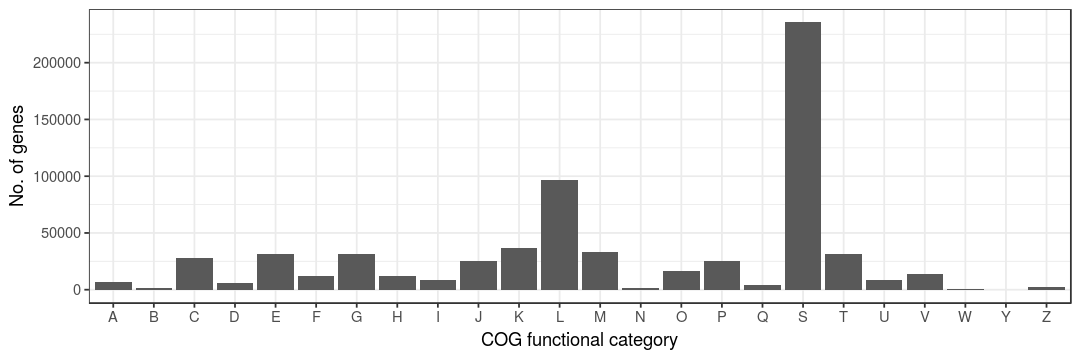

In [91]:
# plotting summary
p = emap_annot_s %>%
    ggplot(aes(COG_func_cat)) +
    geom_bar() +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,3)
plot(p)

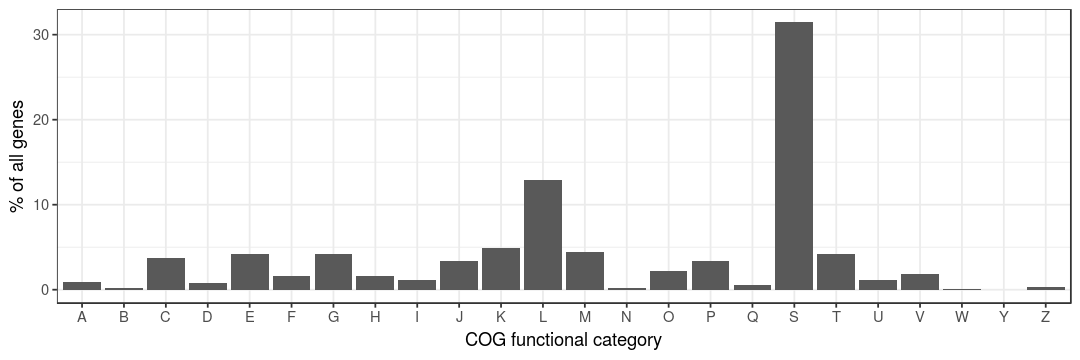

In [92]:
# plotting summary
p = emap_annot_s %>%
    group_by(COG_func_cat) %>%
    summarize(perc_abund = n() / n_annot_seqs * 100) %>%
    ungroup() %>%
    ggplot(aes(COG_func_cat, perc_abund)) +
    geom_bar(stat='identity') +
    labs(x='COG functional category', y='% of all genes') +
    theme_bw() 

dims(9,3)
plot(p)

#### Grouped by taxonomy

In [94]:
emap_annot_s = emap_annot %>%
    dplyr::select(V1, V12) %>%
    separate(V12, LETTERS[1:6], sep=', ') %>%
    gather(X, COG_func_cat, -V1) %>%
    left_join(tax, c('V1'='seqID')) %>%
    filter(!is.na(COG_func_cat),
           COG_func_cat != '') %>%
    dplyr::select(-X) 

emap_annot_s %>% dfhead

Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 748953 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

[1] 670744     12


V1,COG_func_cat,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
bfbd3c2702c049a198d929088bfd1f6d,S,8022,species,Oncorhynchus mykiss,Metazoa,Chordata,Actinopteri,Salmoniformes,Salmonidae,Oncorhynchus,Oncorhynchus mykiss
93840a17ec7340348ac9cc0286e8f29a,S,1758121,subspecies,Limosa lapponica baueri,Metazoa,Chordata,Aves,Charadriiformes,Scolopacidae,Limosa,Limosa lapponica
dbb1d9a4cdfb48a18a783c7e19e99237,A,13735,species,Pelodiscus sinensis,Metazoa,Chordata,unknown,Testudines,Trionychidae,Pelodiscus,Pelodiscus sinensis


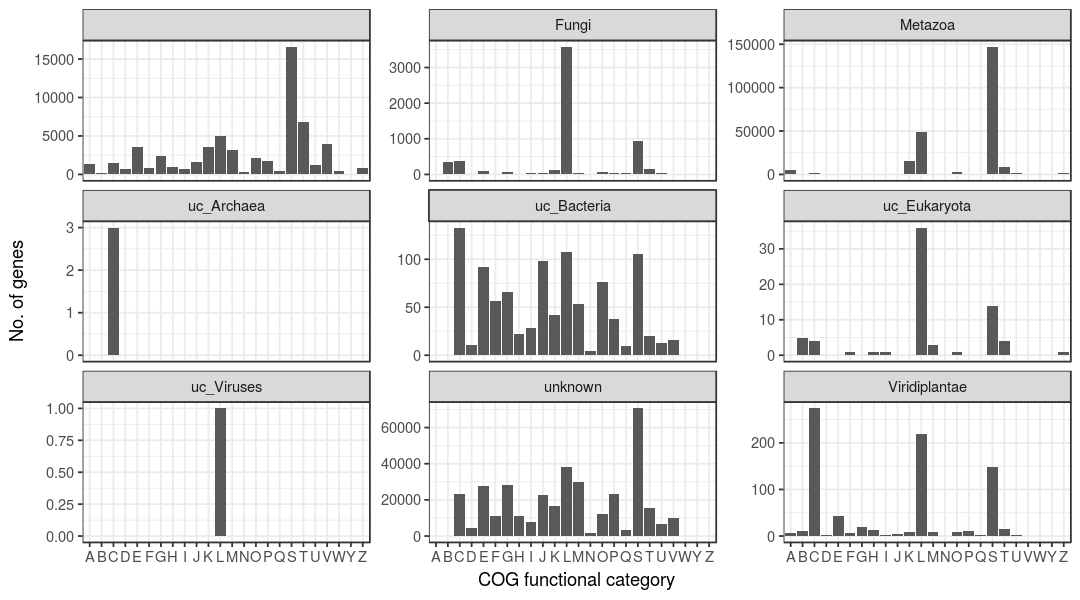

In [96]:
# plotting summary by domain
p = emap_annot_s %>%
    ggplot(aes(COG_func_cat)) +
    geom_bar() +
    facet_wrap(~ Domain, scales='free_y') +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,5)
plot(p)

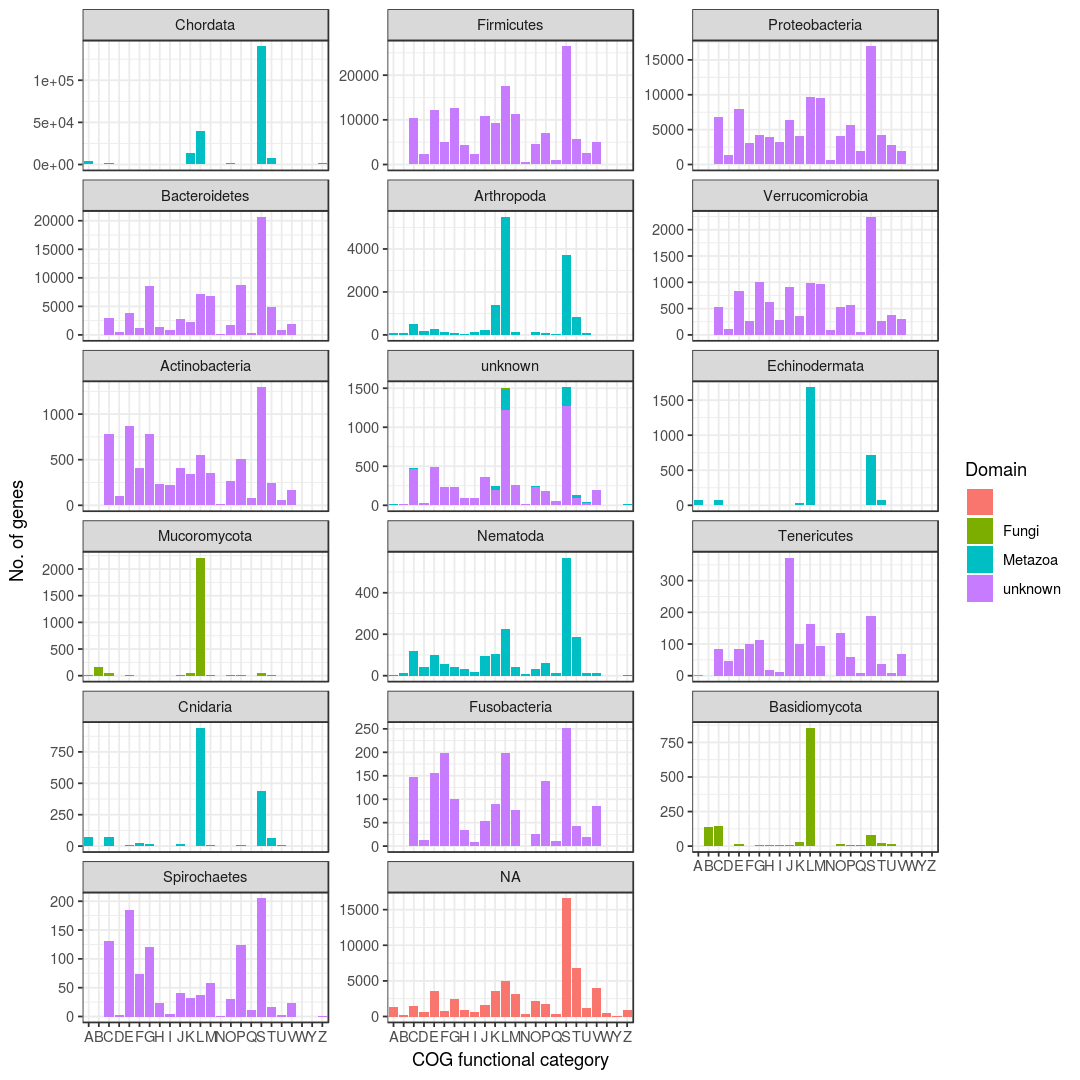

In [104]:
# plotting summary by phylum
p = emap_annot_s %>%
    group_by(Phylum) %>%
    mutate(n = n()) %>%
    ungroup() %>%
    filter(n >= 1000) %>%
    mutate(Phylum = Phylum %>% reorder(-n)) %>%
    ggplot(aes(COG_func_cat, fill=Domain)) +
    geom_bar() +
    facet_wrap(~ Phylum, scales='free_y', ncol=3) +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,9)
plot(p)

## humann2 db genes

* Genes formatted for humann2

In [116]:
# gene IDs
F = file.path(work_dir, 'humann2_db', 'clusters_rep-seqs_annot-index.tsv')

hm2 = fread(F, sep='\t', header=TRUE) %>%
    separate(new_name, c('UniRefID', 'Gene_length', 'Taxonomy'), sep='\\|') %>%
    separate(Taxonomy, c('Genus', 'Species'), sep='\\.s__') %>%
    separate(Species, c('Species', 'TaxID'), sep='__taxID') %>%
    mutate(Genus = gsub('^g__', '', Genus))

hm2 %>% dfhead

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 8564 rows [1, 3, 4, 14, 74, 80, 104, 113, 137, 142, 143, 146, 157, 160, 225, 231, 238, 248, 253, 259, ...].”

[1] 86254     6


original_name,UniRefID,Gene_length,Genus,Species,TaxID
d384109da4d345599c4ded3ba4266f7f,UniRef50_G7PZX1,109,unclassified,unclassified,NA
97fe72285fee4824a8226976384ed8c2,UniRef50_B5KM61,179,Mantidactylus,Mantidactylus_cf_ulcerosus,129014
55630a8ea37b44219d3404fb6cfb128f,UniRef50_G7P766,90,unclassified,unclassified,NA


In [117]:
# adding taxonomy
intersect(hm2$original_name, tax$seqID) %>% length %>% print

hm2 = hm2 %>%
    left_join(tax, c('original_name'='seqID'))

hm2 %>% dfhead

[1] 86254
[1] 86254    16


original_name,UniRefID,Gene_length,Genus.x,Species.x,TaxID,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus.y,Species.y
d384109da4d345599c4ded3ba4266f7f,UniRef50_G7PZX1,109,unclassified,unclassified,NA,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
97fe72285fee4824a8226976384ed8c2,UniRef50_B5KM61,179,Mantidactylus,Mantidactylus_cf_ulcerosus,129014,129014,species,Mantidactylus cf. ulcerosus,Metazoa,Chordata,Amphibia,Anura,Mantellidae,Mantidactylus,Mantidactylus cf. ulcerosus
55630a8ea37b44219d3404fb6cfb128f,UniRef50_G7P766,90,unclassified,unclassified,NA,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA


### Summary

In [118]:
# number of unique UniRef IDs
hm2$UniRefID %>% unique %>% length

[1] 46108

In [119]:
# duplicate UniRef IDs
hm2 %>%
    group_by(UniRefID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    filter(n > 1) %>%
    arrange(-n) %>%
    head(n=30)

UniRefID,n
UniRef50_I1EQT3,1317
UniRef50_G7PZX1,617
UniRef50_Q70X37,297
UniRef50_C1BZP9,279
UniRef50_Q5DGZ9,213
UniRef50_I3KZ71,200
UniRef50_C1BW73,178
UniRef50_A0A026VVF9,177
UniRef50_C1C452,168
UniRef50_E2CA84,162


In [120]:
hm2 %>%
    filter(UniRefID == 'UniRef50_I1EQT3') %>%
    head(n=20)

original_name,UniRefID,Gene_length,Genus.x,Species.x,TaxID,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus.y,Species.y
11a7da584f634777a1d5a8c453d9f533,UniRef50_I1EQT3,167,unclassified,unclassified,NA,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
e99c765620ec4c2f87161e8d3d5eb0bf,UniRef50_I1EQT3,135,unclassified,unclassified,NA,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
284d3e78bb2645208d3f612044c3298a,UniRef50_I1EQT3,127,unclassified,unclassified,NA,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
1fc9ed0074a44eb39e0960d404baa827,UniRef50_I1EQT3,129,unclassified,unclassified,NA,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
626acf2a6a8a4b37af432831bb7c5493,UniRef50_I1EQT3,124,unclassified,unclassified,NA,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
1e65754ef8d04d60974446331e742ace,UniRef50_I1EQT3,137,unclassified,unclassified,NA,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
f98d52f7db3c4a06b30a03d413de3332,UniRef50_I1EQT3,130,unclassified,unclassified,NA,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
b8e0e480aa6b45d6ae5b0e180444a309,UniRef50_I1EQT3,134,unclassified,unclassified,NA,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
d596b5b856be4d2f985e29cb1626f3ac,UniRef50_I1EQT3,158,unclassified,unclassified,NA,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
2a4dcfeee63c4adba27e128725fa325e,UniRef50_I1EQT3,122,unclassified,unclassified,NA,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA


In [121]:
# number of genes with a taxID
hm2_f = hm2 %>%
    filter(!is.na(TaxID))

hm2_f %>% nrow 

[1] 77690

#### By taxonomy

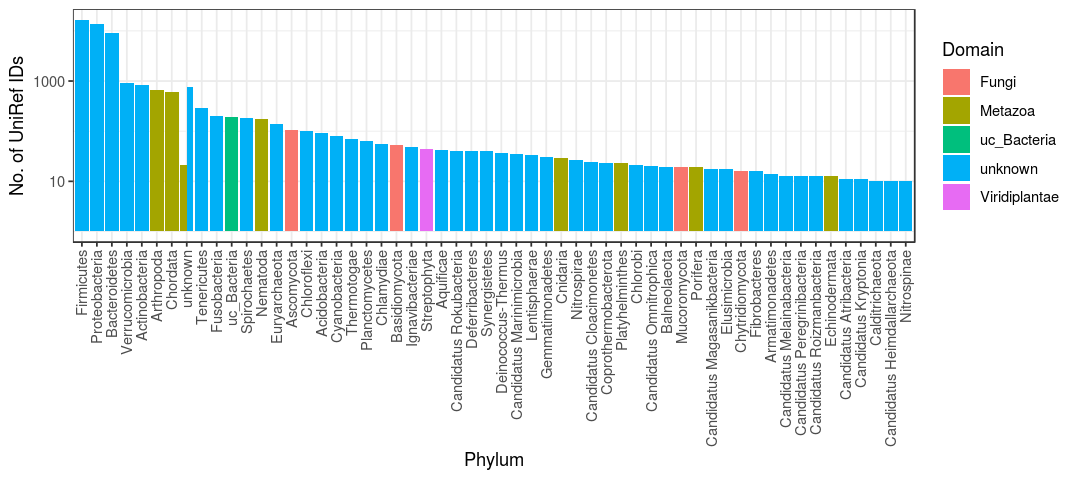

In [133]:
# number of UniRefIDs
hm2_f_s = hm2_f %>%
    group_by(Domain, Phylum) %>%
    summarize(n = UniRefID %>% unique %>% length) %>%
    ungroup()

p = hm2_f_s %>%
    filter(n >= 10) %>%
    mutate(Phylum = Phylum %>% reorder(-n)) %>%
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    labs(y='No. of UniRef IDs') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)
    )
    
dims(9,4)
plot(p)

# sessionInfo

In [132]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.2 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2.2    data.table_1.11.4 ggplot2_3.0.0     tidyr_0.8.1      
[5] dplyr_0.7.6      

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17     pillar_1.2.2     compiler_3.4.1   plyr_1.8.4      
 [5] bindr_0.1.1      base64enc_0.1-3  tools_3.4.1      digest_0.6.15   
 [9] uuid_0.1-2       jsonlite_1.5     evaluate_0.10.1  tibble_1.4.2    
[13] gtable_0.2.0     pkgconfig_2.0.1  rlang_0.2.1      IRdisplay_0.4.4 
[17] IRkernel_0.8.12  repr_0.15.0      withr_2.1.1      stringr_1.3.1   
[21] grid_3.4.1       tidyselec